<a href="https://colab.research.google.com/github/Priyanka-Gangadhar-Palshetkar/MITx-Micromasters-Statistics-Data-Science/blob/main/one_league_w2_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Week 2: Introduction to Machine Learning

**OBJECTIVES**

- Understand goals of machine learning algorithms
- Differentiate between *regression* and *classification* problems
- Use `pandas` to load in datasets 
- Use `matplotlib` and `seaborn` to visualize data
- Build the Perceptron learning algorithm from scratch
- Use `sklearn` to implement the Perceptron algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_blobs, load_digits

In [ ]:
!pip install torch torchvision

In [ ]:
import torch 
from torchvision.datasets import FashionMNIST

### Machine Learning 

Machine Learning is in short using data to make predictions -- the machine "learns" from the data.  These could be predictions about a category, a number, or a similarity to other data points. Typically, these tasks are broken into three categories:

- **Regression**: Predicting a numeric target
- **Classification**: Predicting a categorical target
- **Clustering**: Grouping data points based on "similarity"





In [ ]:
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
digits, labels = load_digits(return_X_y=True)
test_ims = FashionMNIST(root = '.', download = True, train = False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



### Regression or Classification?

What kind of learning problem is given -- regression or classification?

**PROBLEM**: Predict whether or not a passenger survived the titanic using passenger age and fare.

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**PROBLEM**: Predicting the petal width of a flower using other measurements and species data?

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**PROBLEM**: Predicting whether table smoked or not based on the bill and sex of the diners.

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**PROBLEM**: Predicting the type of fashion object in an image?

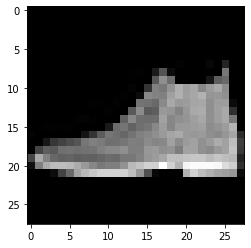

In [ ]:
plt.imshow(test_ims[0][0], cmap = 'gray');

### Train and Test Procedure

```python
from sklearn.model_selection import train_test_split
```

`train_test_split`: splits data into train and test set.

In [ ]:
#use on X
X, y = make_blobs()
X_train, X_test = train_test_split(X)
print(X_train.shape, X_test.shape)

(75, 2) (25, 2)


In [ ]:
#use on y
y_train, y_test = train_test_split(y)
y_train.shape

(75,)

In [ ]:
#use together and set random state
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(75, 2) (75,)
(25, 2) (25,)


### Loading Datasets

For the upcoming assignment in the first module, you will need to load a dataset in and use the data to construct a classification model.  For me, I used the `read_csv` function with an encoding argument and seperator set as the tab `\t`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/reviews_test.tsv', encoding= 'unicode_escape', sep = '\t')

**PROBLEM**: Download and load in a dataset using pandas, create train/test split.

Head over to Yahoo Finance and download the historical data for Tesla [here](https://finance.yahoo.com/quote/TSLA/history?p=TSLA).  Load in the data and create a train/test split using the adjusted closing price as the target (y) and all other columns as features (X).



### A Classification Example

In [ ]:
X, y = make_blobs(n_samples = 1000, 
                  centers = 2, 
                  cluster_std = 3,
                  random_state = 42)

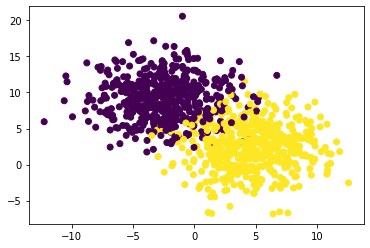

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Determining weights

A simplified expression for the weight update would be:

$$w = w - \alpha(y - \hat{y})x$$

In [ ]:
#initial weights
weights = np.zeros(2)
weights

array([0., 0.])

In [ ]:
#make predictions
yhat = np.where(X_train@weights > 0, 1, 0)
yhat[:5]

array([0, 0, 0, 0, 0])

In [ ]:
#examine accuracy
(yhat == y_train).sum()/y.shape[0]

0.373

In [ ]:
#weight update
weights - 0.1*(y_train - yhat)@X_train

array([-179.86778455,  -82.9114318 ])

In [ ]:
#new weights
new_weights = weights - 0.1*(y_train - yhat)@X_train
yhat = np.where(X_train@new_weights > 0, 1, 0) 
(yhat == y_train).sum()/y.shape[0]

0.276

In [ ]:
#repeatedly update
w = np.zeros(2)
for epoch in range(10):
  yhat = np.where(X_train@w > 0, 0, 1)
  w = w - 0.1*(y_train - yhat)@X_train

w

array([-2607.34665221,  1861.78342853])

In [ ]:
#final accuracy?
final_preds = np.where(X_train@w > 0, 0, 1)
(final_preds == y_train).sum()/y_train.shape[0]


0.9106666666666666

### Considering the offset

In order to incorporate a bias term, we will typically prepend a column of ones to the data and add a weight to reflect this.  Afterward it is the same matrix arithmetic and weight updates.

In [ ]:
# add ones for bias term
b = np.ones((X_train.shape[0], 1))
Xb_train = np.concatenate((b, X_train), axis = 1)
Xb_train[:5]

array([[ 1.        ,  9.82250835,  3.28214069],
       [ 1.        ,  2.7871651 , 10.22923126],
       [ 1.        ,  6.1219694 ,  2.75519098],
       [ 1.        ,  3.33072116,  1.64434027],
       [ 1.        , -4.98568921,  8.0501286 ]])

In [ ]:
# instantiate weights
weights = np.array([0,0,0])

In [ ]:
#update
for epoch in range(10):
  yhat = np.where(Xb_train@weights > 0, 0, 1)
  weights = weights - 0.1*(y_train - yhat)@Xb_train

In [ ]:
#examine performance
final_preds = np.where(Xb_train@weights > 0, 0, 1)
(final_preds == y_train).sum()/y_train.shape[0]

0.9373333333333334

### Using `sklearn`

The three step modeling process:

- Instantiate
- Fit
- Evaluate

In [ ]:
#import Perceptron
from sklearn.linear_model import Perceptron

In [ ]:
#instantiate
model = Perceptron()

In [ ]:
#fit
model.fit(Xb_train, y_train)

Perceptron()

In [ ]:
#score
model.predict(Xb_train)[:5]

array([1, 0, 1, 1, 0])

In [ ]:
model.score(Xb_train, y_train)

0.9306666666666666

In [ ]:
model.score(X_test, y_test)

0.936

**PROBLEM**

Consider the `iris` data loaded previously.  Use the `Perceptron` estimator to predict the flower species using all other columns.

In [ ]:
X = ''
y = ''
X_train, X_test, y_train, y_test = '', '', '', ''

In [ ]:
model = ''

### Analyzing Sentiment

Our task this module involves building a classifier for the sentiment task.  We need a few things to make use of the perceptron algorithm here -- namely to transform the text into numeric representations.  We can do so using the `CountVectorizer` from sklearn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#instantiate


In [ ]:
#transform


In [ ]:
#view results


In [ ]:
#as an array


In [ ]:
#train test split


**PROBLEM**: Use the `Perceptron` estimator from sklearn to build a classifier using the above data and determine its accuracy.